# Project: Medical Appointment No Shows 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set I have selected is **Medical Appointment No Shows** . I have chosen the Medical Appointment No Shows dataset because, as a professional in the IT sector, I am interested in leveraging data to understand the patterns and factors influencing patient attendance., I would like to understand patient behaviour or characteritics behind on why does a patient show up or do not show up for appointment.

> The dataset variables are self explanatory and the orginal variables that exist here are 'PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'



> **The Business questions I am trying to answer are:**
    
    1. Does gender play a role in whether a patient is more likely to attend or miss their medical appointment? 
    
    2. Does a patient's age influence their likelihood of attending or missing a medical appointment?
    
    3. Which weekday, day, or month sees the highest number of appointments where patients actually show up?
    
   
    
     

**Below are the steps involved to understand, clean and prepare our data for data exploration or building a predictive model:**

1. Variable Identification
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

In [45]:

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import numpy as np                                                   
import datetime                                                      
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


In [46]:
import matplotlib.pyplot as plt

def plot_value_counts(df, column_name, figsize=(4, 4), color='r', title=None):
    """
    Plot a bar chart of value counts for a specified column in a DataFrame.

    Parameters:
    - df: DataFrame containing the column to plot.
    - column_name: Name of the column for which to plot value counts.
    - figsize: Tuple specifying the figure size (width, height).
    - color: Color of the bars in the plot.
    - title: Title of the plot. If None, no title is set.
    """
    # Generate the value counts and plot them
    df[column_name].value_counts().plot.bar(figsize=figsize, color=color)
    
    # Add labels and title
    if title:
        plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    
    # Show the plot
    plt.show()


<a id='wrangling'></a>
## Data Wrangling


#### Loading the data 

In [47]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('KaggleV2-May-2016.csv')
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [48]:
# Create the summary report ( Find any anomalies in the data)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Minimum age is showing -ve (May be an outlier) and max value of age are ranging above 100

### Variable Identification

First we will identify the predictor and target variable

In [49]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

No-show is a target variable and all other variables are predictors

In [50]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

### Type of variable

**Predictor variables**


1. Gender             
2. ScheduledDay       
3. AppointmentDay     
4. Age                
5. Neighbourhood      
6. Scholarship        
7. Hipertension       
8. Diabetes           
9. Alcoholism         
10. Handcap           
11. SMS_received      


**Target variable**

1. No-show            



### Data Type

#### Character

Gender ,
ScheduledDay, 
AppointmentDay ,
Neighbourhood,
No-show

#### Numeric

PatientId, AppointmentID,  Age,  Scholarship, Hipertension,
       Diabetes, Alcoholism, Handcap, SMS_received

### Variable Category

#### Categorical

        'Gender', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'



In [51]:
#Check missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no missing values in the above dataset

In [52]:
#structure of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Check for some sample counts

In [53]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [54]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [55]:
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [56]:
#Check for scheduled day and appointment day  
df[['ScheduledDay','AppointmentDay']].head(5)

,ScheduledDay,AppointmentDay
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


In [57]:
# # Convert that dateformat which is in string to datetime64[ns]
# The day of the week with Monday=0, Sunday=6

df['ScheduledDay'] = df['ScheduledDay'].apply(np.datetime64)
df['Day_Scheduled'] = df['ScheduledDay'].dt.day
df['weekday_Scheduled'] = df['ScheduledDay'].dt.dayofweek
df['Month_Scheduled'] = df['ScheduledDay'].dt.month


df['AppointmentDay'] = df['AppointmentDay'].apply(np.datetime64)
df['Day_appointed'] = df['AppointmentDay'].dt.day
df['weekday_appointed'] = df['AppointmentDay'].dt.dayofweek
df['Month_appointed'] = df['AppointmentDay'].dt.month

In [58]:
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [59]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [60]:
df['Month_appointed'].nunique()

3

In [61]:
#Rename the columns which have incorrect spelling mistakes - this will helps us create columns in easy to understand way
df.rename(columns = {'Hipertension' : 'Hypertension', 'Handcap':'Handicap', 'No-show' : 'NoShow'}, inplace = True)
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow,Day_Scheduled,weekday_Scheduled,Month_Scheduled,Day_appointed,weekday_appointed,Month_appointed
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29,4,4,29,4,4
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,29,4,4,29,4,4
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,29,4,4,29,4,4


In [62]:
# this function has two parameters, and it returns a value
def print_unique_value(column_name, column):
   print("the unique values for {} are {}".format(column_name, df[column].unique()))
   # return True

# call the function with two arguments
# find the unique values for each of the columns specified
for column in df.columns:
   print_unique_value(column, column)


the unique values for PatientId are [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
the unique values for AppointmentID are [5642903 5642503 5642549 ... 5630692 5630323 5629448]
the unique values for Gender are ['F' 'M']
the unique values for ScheduledDay are ['2016-04-29T18:38:08.000000000' '2016-04-29T16:08:27.000000000'
 '2016-04-29T16:19:04.000000000' ... '2016-04-27T16:03:52.000000000'
 '2016-04-27T15:09:23.000000000' '2016-04-27T13:30:56.000000000']
the unique values for AppointmentDay are ['2016-04-29T00:00:00.000000000' '2016-05-03T00:00:00.000000000'
 '2016-05-10T00:00:00.000000000' '2016-05-17T00:00:00.000000000'
 '2016-05-24T00:00:00.000000000' '2016-05-31T00:00:00.000000000'
 '2016-05-02T00:00:00.000000000' '2016-05-30T00:00:00.000000000'
 '2016-05-16T00:00:00.000000000' '2016-05-04T00:00:00.000000000'
 '2016-05-19T00:00:00.000000000' '2016-05-12T00:00:00.000000000'
 '2016-05-06T00:00:00.000000000' '2016-05-20T00:00:00.000000

Age has values with -1 (Which is unrealistic) and > 100 (There might be few patients with > 100 , but we can consider these patients as outliers)

In [63]:
# Check how many records with age < 0 and age > 100
df.query('Age < 0  | Age > 100').count()

PatientId            8
AppointmentID        8
Gender               8
ScheduledDay         8
AppointmentDay       8
Age                  8
Neighbourhood        8
Scholarship          8
Hypertension         8
Diabetes             8
Alcoholism           8
Handicap             8
SMS_received         8
NoShow               8
Day_Scheduled        8
weekday_Scheduled    8
Month_Scheduled      8
Day_appointed        8
weekday_appointed    8
Month_appointed      8
dtype: int64

8 Records have Age < 0 and Age > 100. Hence consider these patients as outliers and remove them 

In [64]:
df.drop(df[(df.Age < 0) | (df.Age > 100)].index, inplace = True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110519 non-null  float64       
 1   AppointmentID      110519 non-null  int64         
 2   Gender             110519 non-null  object        
 3   ScheduledDay       110519 non-null  datetime64[ns]
 4   AppointmentDay     110519 non-null  datetime64[ns]
 5   Age                110519 non-null  int64         
 6   Neighbourhood      110519 non-null  object        
 7   Scholarship        110519 non-null  int64         
 8   Hypertension       110519 non-null  int64         
 9   Diabetes           110519 non-null  int64         
 10  Alcoholism         110519 non-null  int64         
 11  Handicap           110519 non-null  int64         
 12  SMS_received       110519 non-null  int64         
 13  NoShow             110519 non-null  object  

In [66]:
#Uniuqe patient counts in the dataset
df.PatientId.nunique()

62294

### Univariate Analysis

We will first look at the target variable, i.e., NoShow. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. 
Frequency table of a variable will give us the count of each category in that variable.

In [67]:
df['NoShow'].value_counts()

No     88203
Yes    22316
Name: NoShow, dtype: int64

In [68]:
# Normalise can be set to true to print the proportions instead of Numbers.
df['NoShow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64

Here there is no class imbalance problem . Hence we can proceed further without addressing any class imbalance issues

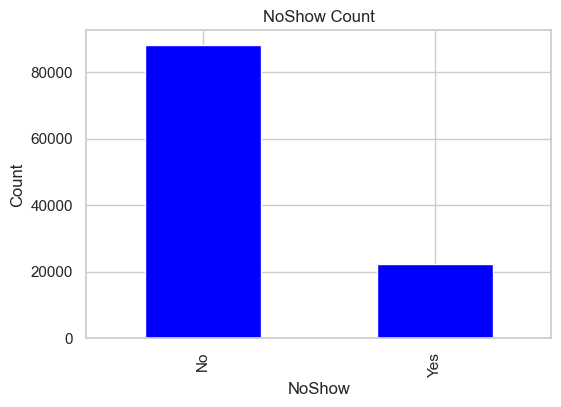

In [69]:
plot_value_counts(df, 'NoShow', figsize=(6, 4), color='blue', title='NoShow Count')



The patient records or instances who DO NOT show up on scheduled time  are of 22,316 (around 20%) and who show up  are
88,203(around 80%) out of total 110,480.

Now lets visualize each variable separately. Different types of variables are Categorical and numerical.

•Categorical features: These features have categories ('Gender', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'
                    )

•Numerical features: These features have numerical values (Age, Day_Scheduled and Day_appointed) 


There are date columns as well, I have placed them in numeric bucket.


#### Let’s visualize the categorical and ordinal features first.

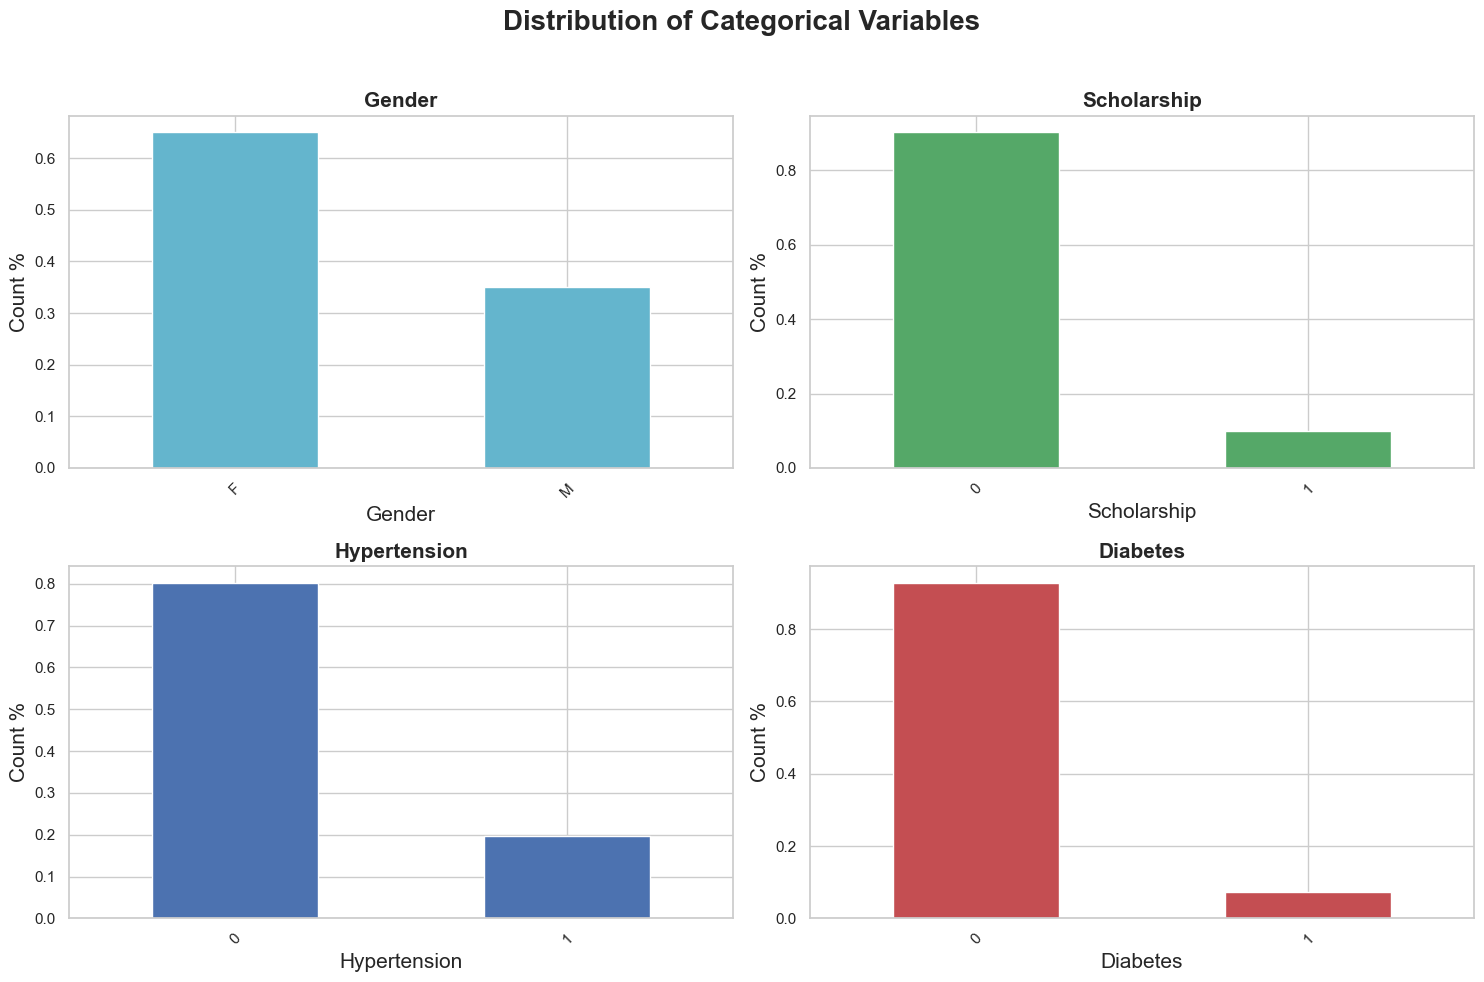

In [100]:
# Define the columns to plot and colors
iter_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes']
colors = ['c', 'g', 'b', 'r']

# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column in a subplot using the function
for i, col in enumerate(iter_cols):
    plot_value_counts(df, col, axes[i], color=colors[i], title=col)


# Add a title for the entire figure
fig.suptitle('Distribution of Categorical Variables', fontsize=20, fontweight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate the suptitle


# Show the plots
plt.show()
 


It can be inferred from the above bar plots that:

* ~65% patient instances are with female records 
* Around 85% of the these instances are not having scholarship.
* ~20% of patient instances have Hypertension.
* ~88% of patient instacnes do not have diabetes 


<Figure size 640x480 with 0 Axes>

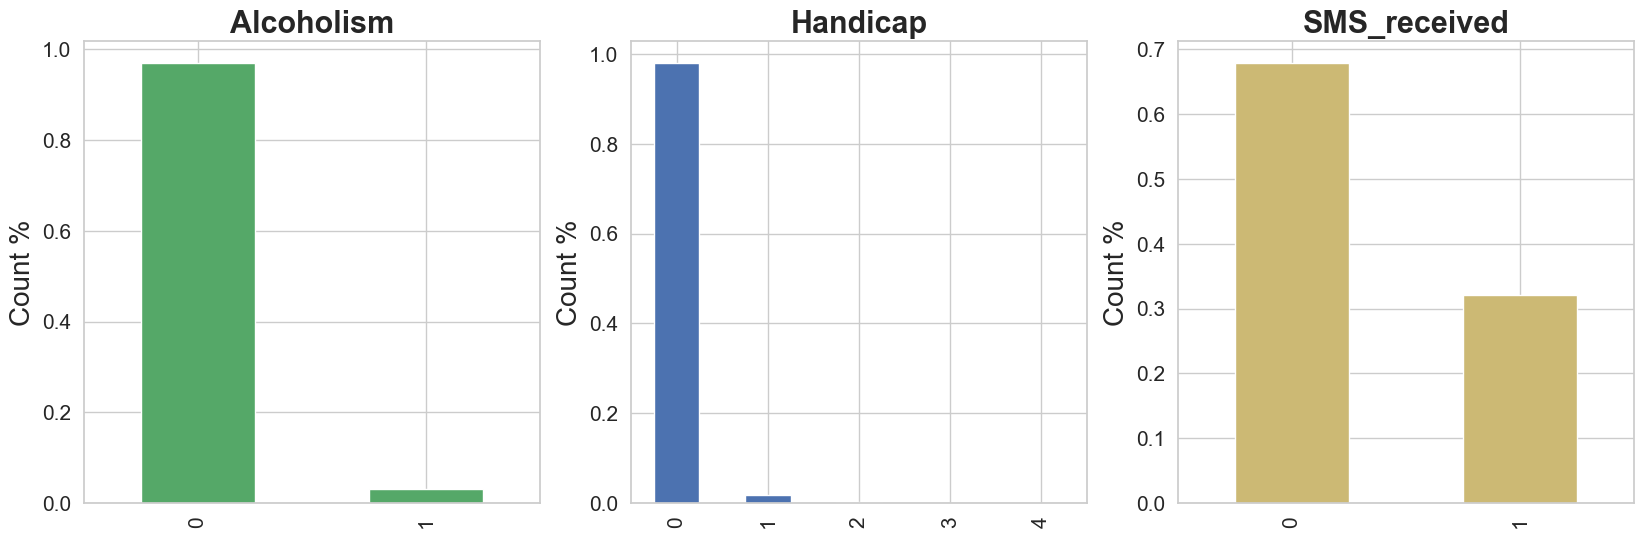

In [71]:
plt.figure(1)
plt.figure(figsize = (15,10))
iter_cols = ['Alcoholism', 'Handicap', 'SMS_received']

colour = ['g', 'b', 'y']
i = 0
for col in iter_cols:    
    plt.subplot(int(str(13)+str((iter_cols.index(col)+1))))
    df[col].value_counts(normalize=True).plot.bar(figsize=(20,6), fontsize = 15.0, color = colour[i])
    plt.title(col, fontweight="bold", fontsize = 22.0)
    plt.ylabel('Count %', fontsize = 20.0)
    i = i +1   


It can be inferred from the above bar plots that:

* ~98% patient instances are alcoholics.
* ~99% of the patient instances are with Handicap status = 0
* ~70% of the patient instances have received SMS regarding the appointment /scheduled time



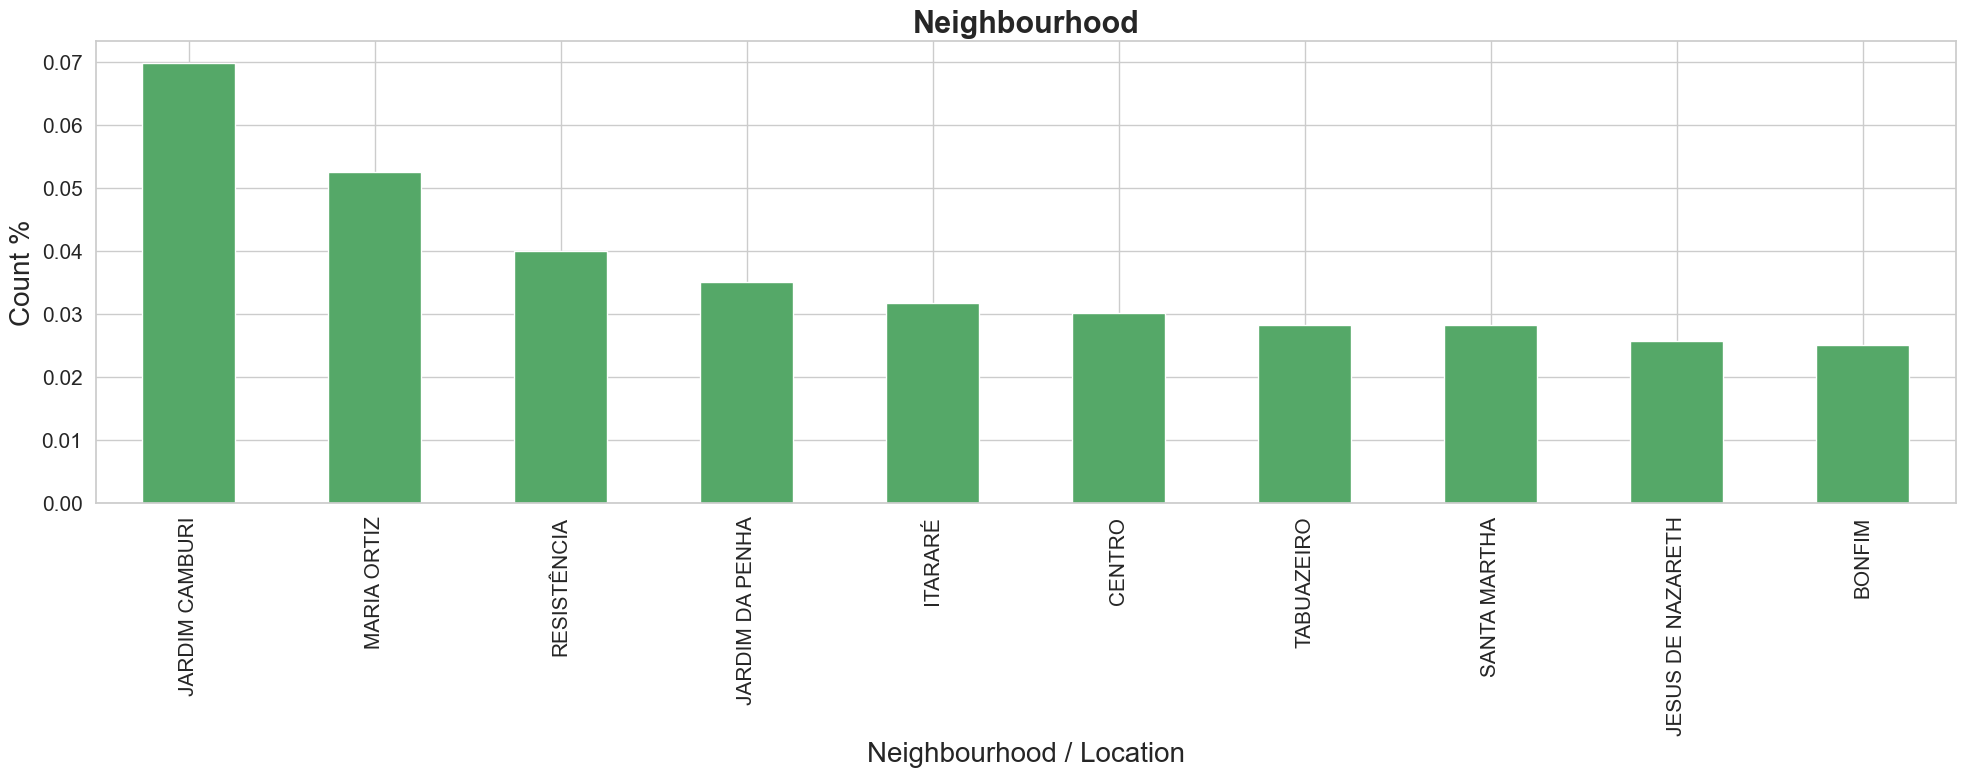

In [72]:
# Plot the neighbourhood values
df['Neighbourhood'].value_counts(normalize=True).sort_values(ascending = False)[:10].plot.bar(figsize=(24,6), fontsize = 15.0, color = 'g')
plt.title('Neighbourhood', fontweight="bold", fontsize = 22.0)
plt.ylabel('Count %', fontsize = 20.0)
plt.xlabel('Neighbourhood / Location', fontsize = 20.0)
plt.show()

JARDIM CAMBURI location has majority of the patient instances , followed by MARIA ORTIZ

#### Let's visualize the Numerical Attributes

(Age, Day_Scheduled and Day_appointed) 



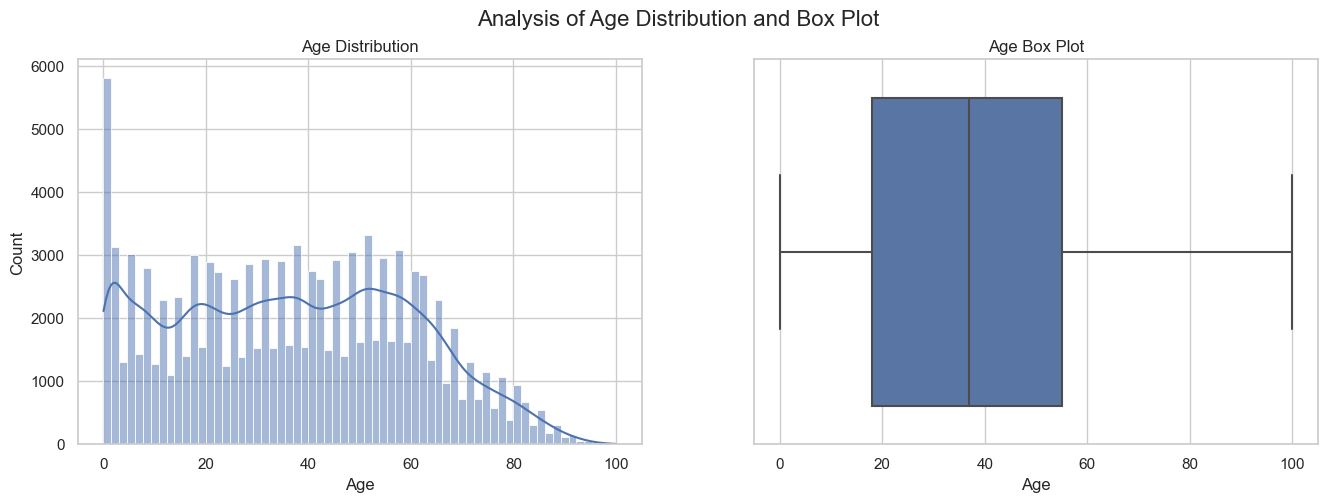

In [73]:
# Set the figure size
plt.figure(figsize=(16, 5))

# First subplot - Distribution plot with title
plt.subplot(121)
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')

# Second subplot - Box plot with title
plt.subplot(122)
sns.boxplot(x=df['Age'])
plt.title('Age Box Plot')

# Main title for the entire figure
plt.suptitle('Analysis of Age Distribution and Box Plot', fontsize=16)

plt.show()


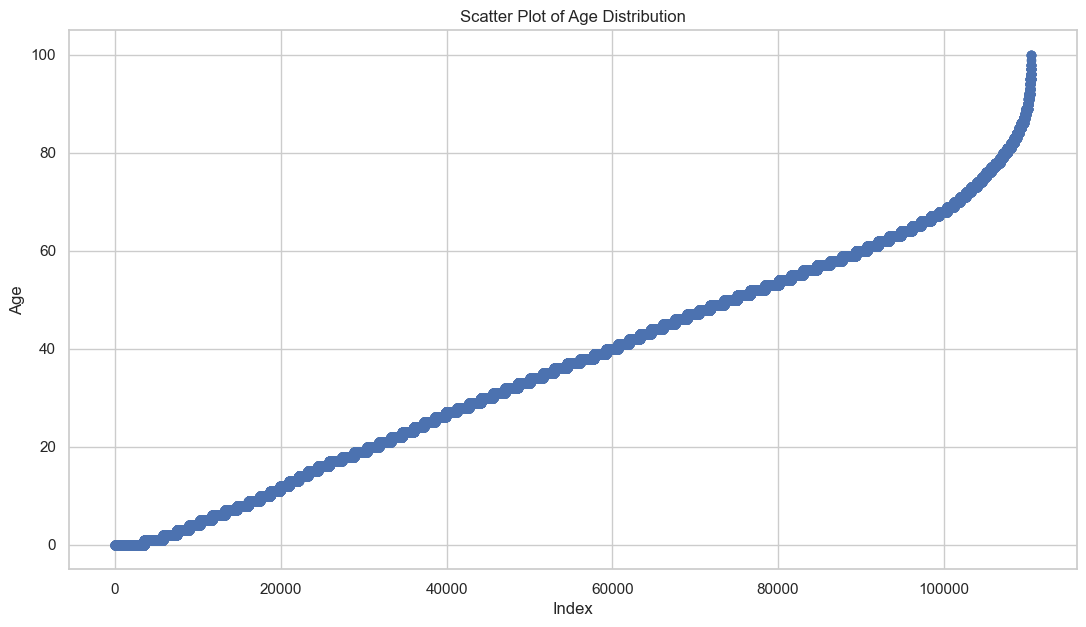

In [74]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py

# Assuming df is your DataFrame

# Scatter Plot of Age Distribution
plt.figure(figsize=(13, 7))
plt.scatter(range(df.shape[0]), np.sort(df['Age'].values))
plt.xlabel('Index', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Scatter Plot of Age Distribution')
plt.show()

# Bar Chart of Age Distribution
cnt_srs = df['Age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale='Viridis',
        showscale=True
    ),
)
layout = go.Layout(
    title='Age Distribution',
    xaxis=dict(title='Age'),
    yaxis=dict(title='Count'),
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age_distribution")


* From the above age graph there are no outliers 

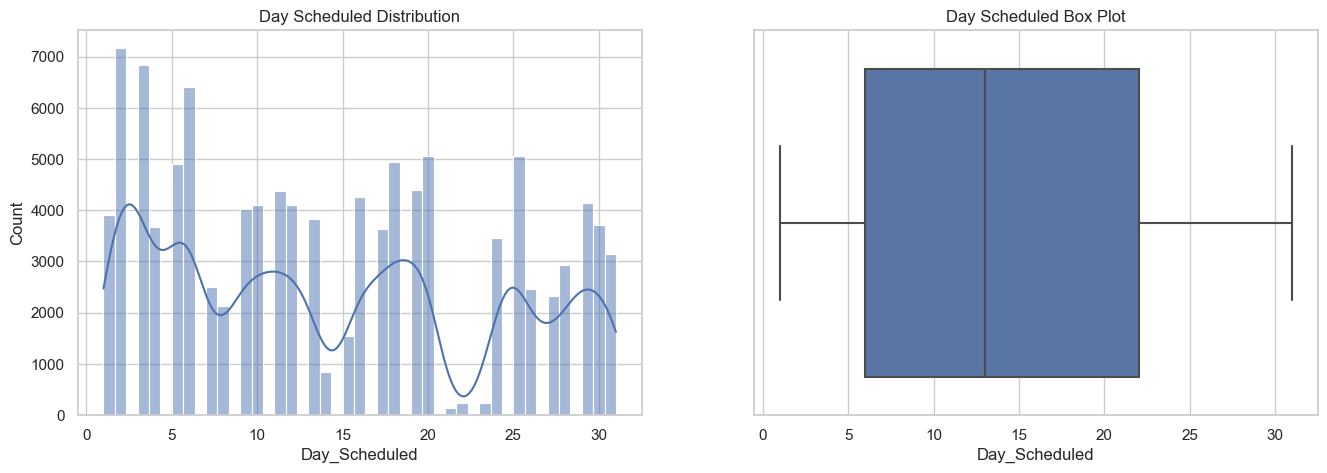

In [75]:

# Set the figure size
plt.figure(figsize=(16, 5))

# First subplot - Distribution plot with title
plt.subplot(121)
sns.histplot(df['Day_Scheduled'], kde=True)
plt.title('Day Scheduled Distribution')

# Second subplot - Box plot with title
plt.subplot(122)
sns.boxplot(x=df['Day_Scheduled'])
plt.title('Day Scheduled Box Plot')

# Show the plots
plt.show()


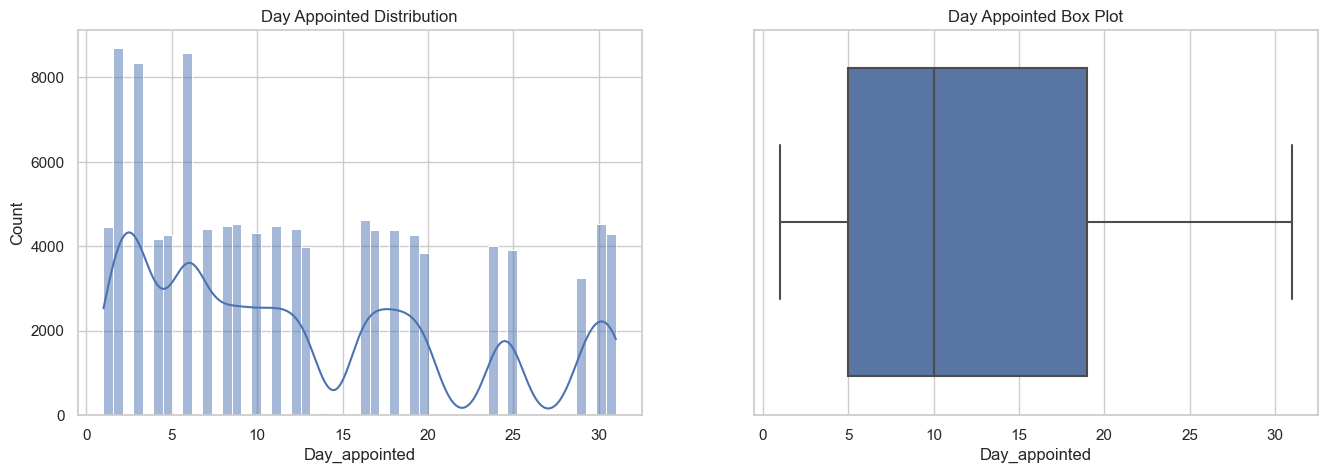

In [76]:

# Set the figure size
plt.figure(figsize=(16, 5))

# First subplot - Distribution plot with title
plt.subplot(121)
sns.histplot(df['Day_appointed'], kde=True)
plt.title('Day Appointed Distribution')

# Second subplot - Box plot with title
plt.subplot(122)
sns.boxplot(x=df['Day_appointed'])
plt.title('Day Appointed Box Plot')

# Show the plots
plt.show()


### Bi-variate Analysis

#### Categorical Independent Variable vs Target Variable

We will first look at the target variable, i.e., NoShow. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot. Frequency table of a variable will give us the count of each category in that variable.

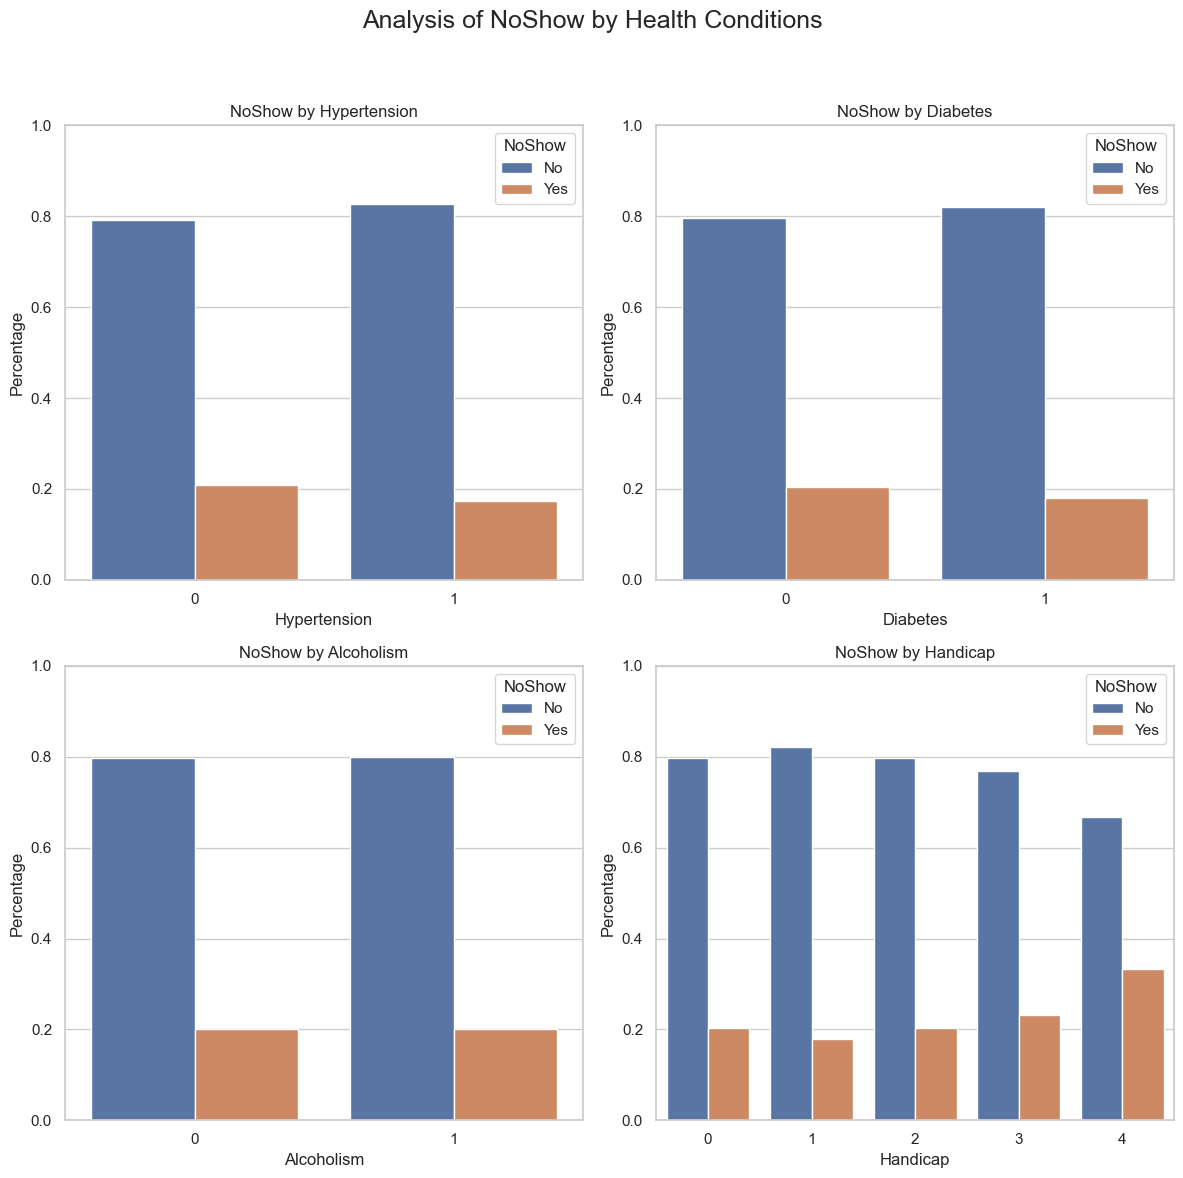

In [77]:

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# List of categorical variables to plot
categorical_vars = ['Hypertension', 'Diabetes', 'Alcoholism', 'Handicap']

# Loop over the categorical variables and create plots
for col, ax in zip(categorical_vars, axes.flatten()):
    # Create a cross-tabulation to count occurrences
    counts = pd.crosstab(df[col], df['NoShow'])
    
    # Calculate the percentage for each category
    perct_per_group = counts.div(counts.sum(axis=1), axis=0).reset_index()
    
    # Melt the DataFrame to make it suitable for seaborn
    perct_per_group = perct_per_group.melt(id_vars=col, value_vars=['No', 'Yes'], 
                                           var_name='NoShow', value_name='Percentage')
    
    # Plot using seaborn
    sns.barplot(x=col, y='Percentage', hue='NoShow', data=perct_per_group, ax=ax)
    
    # Set the title for each subplot
    ax.set_title(f'NoShow by {col}')
    ax.set_ylim(0, 1)  # Set y-axis limits to 0-1 for percentage
    
# Main title for the entire figure
fig.suptitle('Analysis of NoShow by Health Conditions', fontsize=18)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust to leave space for the main title
plt.show()


In [78]:
# Normalise can be set to true to print the proportions instead of Numbers.
df['NoShow'].value_counts(normalize=True)

No     0.79808
Yes    0.20192
Name: NoShow, dtype: float64

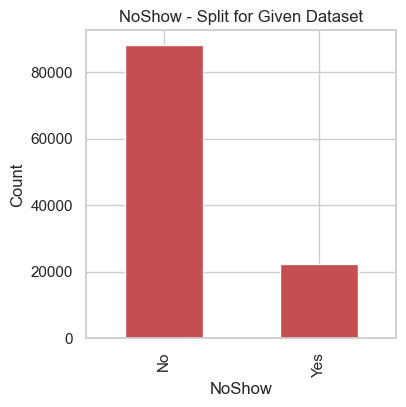

In [79]:

# Plot the bar chart
df['NoShow'].value_counts().plot.bar(figsize=(4, 4), color='r')

# Add title and labels
plt.title('NoShow - Split for Given Dataset')
plt.xlabel('NoShow')
plt.ylabel('Count')

# Show the plot
plt.show()


The patient records or instances who DO NOT show up on scheduled time are of 22,312 (around 20%) and who show up are 88,168(around 80%) out of total 110,480.
Now lets visualize each variable separately. Different types of variables are Categorical and numerical.
•Categorical features: These features have categories ('Gender', 'Neighbourhood', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show' )
•Numerical features: These features have numerical values (Age, Day_Scheduled and Day_appointed)
There are date columns as well, I have placed them in numeric bucket.

Let’s visualize the categorical and ordinal features first.


The inferences that can be made from here are:
* Not much of difference in Female/Male groups with "NoShow" status
* Instances who have scholarship have slightly more "NoShow" status
* Hypertension & Diabetes instances have more "NoShow" status
* Not much of difference in Alcoholism/Non-Alcoholism groups with "NoShow" status
* Handicap with category 4 have more "NoShow" status



#### Bi-variate Analysis on Numeric variables vs Target variable

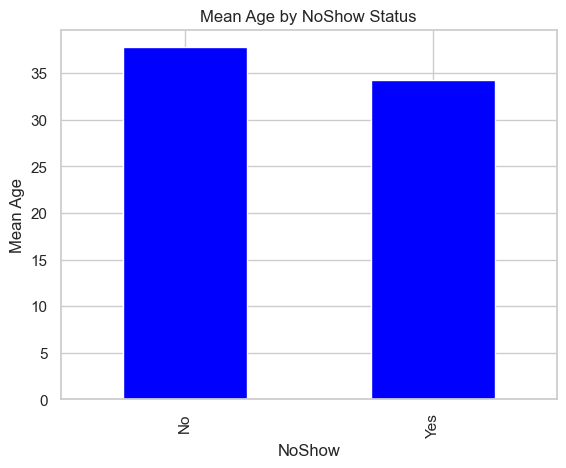

In [80]:

# Calculate the mean age for each NoShow group and plot it
df.groupby('NoShow')['Age'].mean().plot.bar(color='blue')

# Add labels and title
plt.ylabel('Mean Age')
plt.xlabel('NoShow')
plt.title('Mean Age by NoShow Status')

# Show the plot
plt.show()


* The mean age group of instances with "NoShow" have lesser age 

### Missing values treatment & Outlier treatment

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110519 entries, 0 to 110526
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PatientId          110519 non-null  float64       
 1   AppointmentID      110519 non-null  int64         
 2   Gender             110519 non-null  object        
 3   ScheduledDay       110519 non-null  datetime64[ns]
 4   AppointmentDay     110519 non-null  datetime64[ns]
 5   Age                110519 non-null  int64         
 6   Neighbourhood      110519 non-null  object        
 7   Scholarship        110519 non-null  int64         
 8   Hypertension       110519 non-null  int64         
 9   Diabetes           110519 non-null  int64         
 10  Alcoholism         110519 non-null  int64         
 11  Handicap           110519 non-null  int64         
 12  SMS_received       110519 non-null  int64         
 13  NoShow             110519 non-null  object  

In [82]:
df.isnull().sum()

PatientId            0
AppointmentID        0
Gender               0
ScheduledDay         0
AppointmentDay       0
Age                  0
Neighbourhood        0
Scholarship          0
Hypertension         0
Diabetes             0
Alcoholism           0
Handicap             0
SMS_received         0
NoShow               0
Day_Scheduled        0
weekday_Scheduled    0
Month_Scheduled      0
Day_appointed        0
weekday_appointed    0
Month_appointed      0
dtype: int64

* There are no missing values and it seems there are no outliers from the univariate analysis done earlier (There were some patients with Age < 0 and Age > 100 , I have removed them from the data )

### Feature Engineering

Feature engineering is the science (and art) of extracting more information from existing data. 
You are not adding any new data here, but you are actually making the data you already have more useful.

Feature engineering itself can be divided in 2 steps:

* Variable transformation.
* Variable / Feature creation.

#### Variable Transformation

In data modelling, transformation refers to the replacement of a variable by a function. For instance, replacing a variable x by the square / cube root or logarithm x is a transformation.
In other words, transformation is a process that changes the distribution or relationship of a variable with others.

Here in this case study , I do not see any transformations are required for the variables listed for this dataset

#### Variable creation

Yes the AppointmentTime and ScheduledTime  are converted into day of month with names Day_Scheduled and Day_appointed

* Let us drop unnecessary columns

In [83]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

##### the columns below are unnecessary because they don't add any prediction value, hence we can drop them
'PatientId', 'AppointmentID', 'ScheduledDay',  'AppointmentDay'

In [84]:
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay'], axis = 1, inplace = True)

In [85]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'NoShow',
       'Day_Scheduled', 'weekday_Scheduled', 'Month_Scheduled',
       'Day_appointed', 'weekday_appointed', 'Month_appointed'],
      dtype='object')

In [86]:
df['weekday_appointed'].unique()

array([4, 1, 0, 2, 3, 5], dtype=int64)

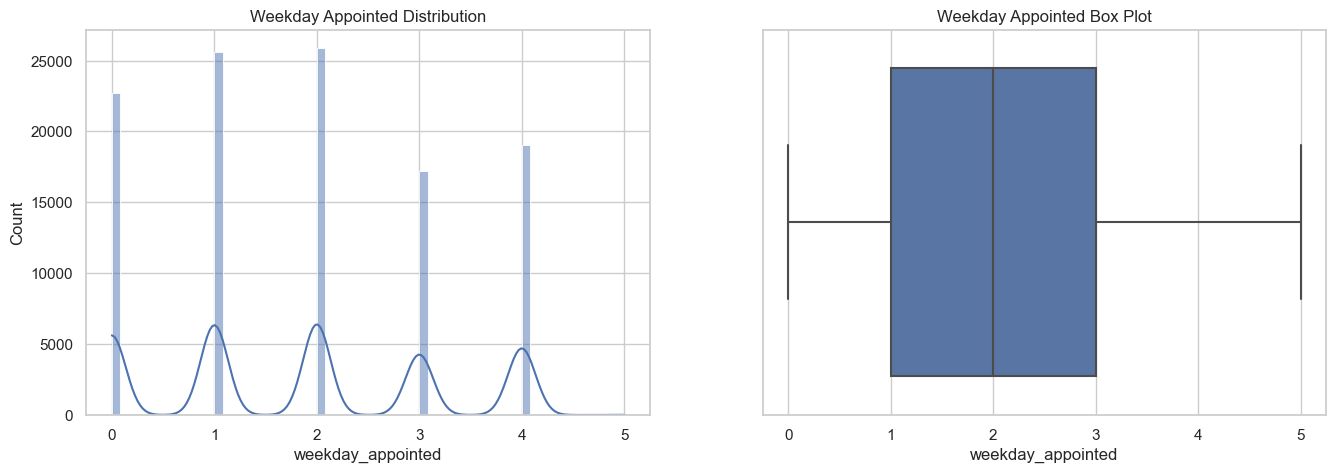

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(16, 5))

# First subplot - Distribution plot
plt.subplot(121)
sns.histplot(df['weekday_appointed'], kde=True)
plt.title('Weekday Appointed Distribution')

# Second subplot - Box plot
plt.subplot(122)
sns.boxplot(x=df['weekday_appointed'])
plt.title('Weekday Appointed Box Plot')

# Show the plots
plt.show()


Tuesday and Wednesday have maximum number of appointments

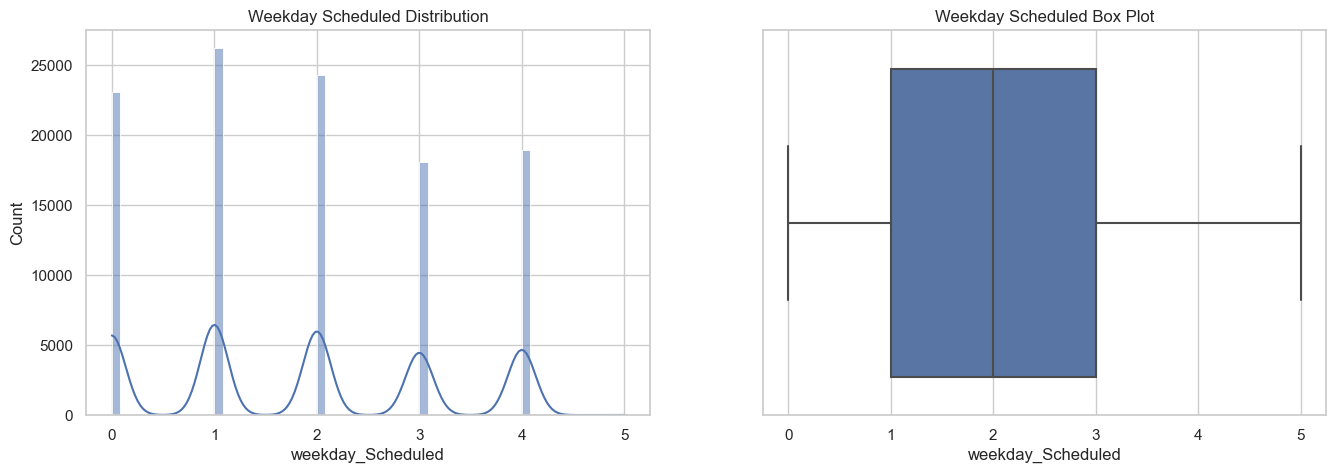

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(16, 5))

# First subplot - Distribution plot
plt.subplot(121)
sns.histplot(df['weekday_Scheduled'], kde=True)
plt.title('Weekday Scheduled Distribution')

# Second subplot - Box plot
plt.subplot(122)
sns.boxplot(x=df['weekday_Scheduled'])
plt.title('Weekday Scheduled Box Plot')

# Show the plots
plt.show()


* Now the data set is almost cleaned with all the pre-processing steps. Now we can do an Exploratory Data Analysis


<a id='eda'></a>
## Exploratory Data Analysis

> Now I will be answering all the questions mentioned above with my analysis

### 1. Is there any Gender difference in having a patient to be with status Show / No-Show? 

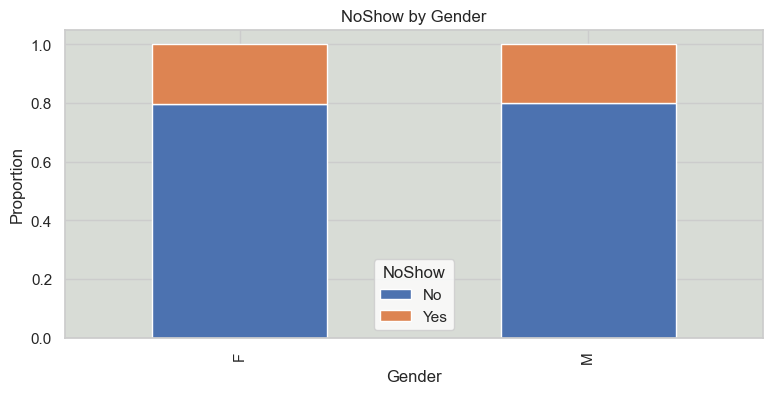

In [89]:

# Create a figure and axis
fig, ax = plt.subplots(figsize=(9, 4))

# Create a cross-tabulation for Gender and NoShow
Gender = pd.crosstab(df['Gender'], df['NoShow'])

# Normalize the counts to get proportions
Gender_proportion = Gender.div(Gender.sum(1).astype(float), axis=0)

# Plot the stacked bar chart
Gender_proportion.plot(kind="bar", stacked=True, ax=ax)

# Set the background color of the axis
ax.set_facecolor('#d8dcd6')

# Add a title and labels (optional)
ax.set_title('NoShow by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Proportion')

# Show the plot
plt.show()


* There is not much of difference with gender in having the status with Show/NoShow

### 2. Is there any Age difference in having a patient to be with status Show / No- Show?

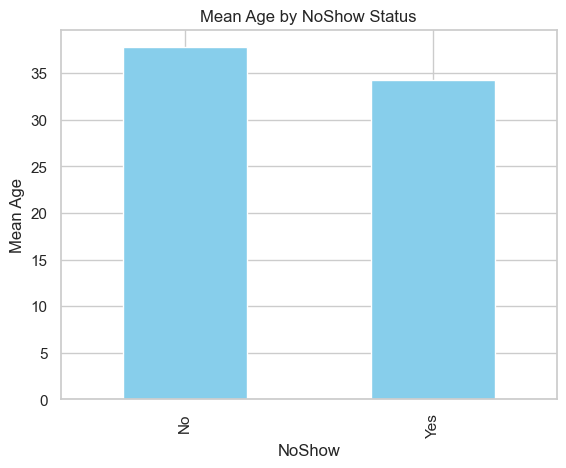

In [90]:
import matplotlib.pyplot as plt

# Create the bar plot
fig, ax = plt.subplots()
df.groupby('NoShow')['Age'].mean().plot.bar(ax=ax, color='skyblue')

# Add labels and title
ax.set_ylabel('Mean Age')
ax.set_xlabel('NoShow')
ax.set_title('Mean Age by NoShow Status')

# Show the plot
plt.show()


* The mean age group of instances with "NoShow = Yes" have lesser age

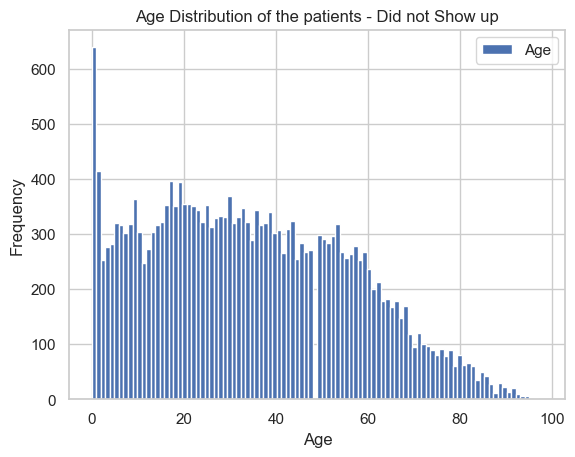

In [91]:
# Age Distribution
# Get the distribution for only NoShow = 1 / Yes
df_NoShow = df[df['NoShow']  == "Yes"]
df_NoShow.plot(kind = "hist",y = "Age",bins = 100, color = 'b') 
plt.title('Age Distribution of the patients - Did not Show up')
plt.xlabel('Age');

* Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the   appointment when compared to age groups 0-20, 40-60 and 60 plus

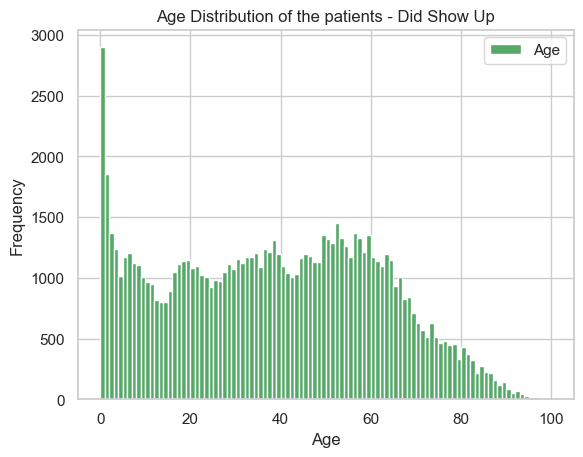

In [92]:
df_Show = df[df['NoShow'] == "No"]
df_Show.plot(kind = "hist",y = "Age",bins = 100, color = 'g') 
plt.title('Age Distribution of the patients - Did Show Up')
plt.xlabel('Age')
plt.show()

* Of the patients who have showed up for appointment,
  it seems that age group from 40 to 60 have really showed interest in appointment when compared to age groups of 0-20, 20-40 and 60 plus.  

### 3. Is there any Age difference along with Gender difference with the status of Show / NoShow?

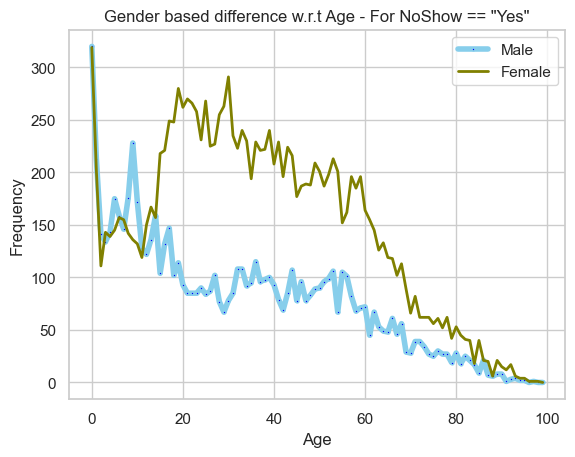

In [93]:
# Analysing the distribution among genders with their age whose status for NoShow is "Yes"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'Yes')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'Yes')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "Yes"');

* Female patients with Age group from 20 to 40 are NOT active in getting appointment
  with doctors when compared to similar age group of Males

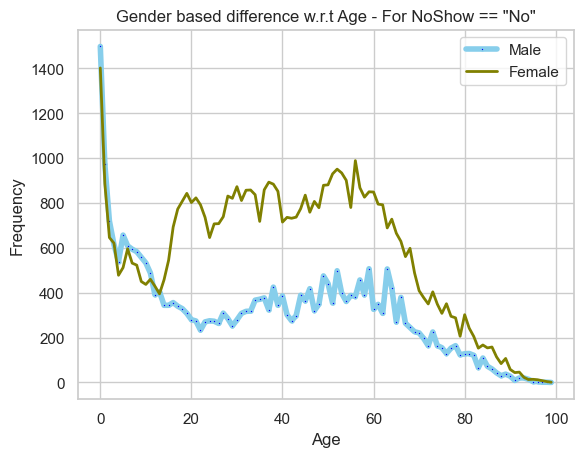

In [94]:
# Analysing the distribution among genders with their age whose status for NoShow is "No"
# i.e, they are NOT coming for the appointment.
range_df = pd.DataFrame()
range_df['Age'] = range(100) # Setting up for the age limit of 100 only
Male = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'M') & (df.NoShow == 'No')]))
Female = range_df.Age.apply(lambda x:len(df[(df.Age == x) & (df.Gender == 'F') & (df.NoShow == 'No')]))

# multiple line plot
plt.plot( range_df, Male, marker='o', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=4)
plt.plot( range_df, Female, marker='', color='olive', linewidth=2)
plt.legend(['Male','Female'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Gender based difference w.r.t Age - For NoShow == "No"');

* Female patients with Age group from 40 to 60 are active in getting appointment
  with doctors when compared to similar age group of Males

### Limitations

1. If we know the actual patient population from a particular neighborhood, then we can get a reason on why majority of the patients are coming from Jardim Camburi.

2. The data contained only April, May and June data - If there are complete full year data on monthly basis, we can actually identify the traffic months for physicians appointments

3. If we had the data on how many SMS are sent to patient, we can actually find out that how many SMS reminders are required for a patient to get active for appointment.

4. If we would have got the disease severity of each patient, we can try and answer on why certain age group patients are having more visits compared to other age groups.

<a id='conclusions'></a>
## Conclusions

* 1. Of those patients who have showed up for appointment, majority patients with age group from 20 to 40 did not show up for the appointment when compared to age groups 0-20, 40-60 and 60 plus. of these 20 to 40 age group, Female patients are NOT active in getting appointment with doctors when compared to similar age group of Males

* 2. Majority of the visits or appointments happend on the weeekdays (Monday, Tuesday and Wednesday) when compared to weekends. Hence weekdays are the best for good conversion for appointment

* 3. Hypertension and Diabetes patients are attending the doctor when compared to other medications. Age ranges from 40 to 80 - with females conversion is better than Males. 

* 4. Alcoholism patients from Male group have showed up for physician visit when  compared to female and they are in range from 45 to 65. 

* 5. If there are any promotions towards digital media either through SMS / emails, the conversion  for physician visit will improve and from the data it is inferred that patients (~25K visits) who have recieved SMS have turned up for physician visit.

* 6. On contrary actually we would expect that patients who have got scholarship  should have been all attended the physician but it seems that ~25% of patients did not attend.

* 7. Majority of the visits happend from Jardim Camburi, but we are not sure on why this happend. There might be many reasons like majority of the patient population might be from that place or majority of the physicians are from that location. This is one of the limitations



In [95]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1

### References

1. https://python-graph-gallery.com/122-multiple-lines-chart/

2. https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/
    

3. Kaggle Kernels
   https://www.kaggle.com/sudalairajkumar/an-interactive-deep-dive-into-survey-results